## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()

X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().any().any()
# Пропущенных значений нет

False

In [4]:
X.info()
# Категориальных признаков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
np.random.seed(12345)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
NN = [1, 3, 5, 10, 15, 25]

X_train_data = X_train[['alcohol', 'magnesium']]
Y_train_data = y_train

X_test_data = X_test[['alcohol', 'magnesium']]
Y_test_data = y_test

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train_data), columns = X_train_data.columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test_data), columns = X_test_data.columns)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print(f"{'NN' : <10}{'Train' : <10}{'Test' : <10}") 
list_of_classifiers = []
for number_of_neigbours in NN:
    clf = KNeighborsClassifier(n_neighbors=number_of_neigbours)
    clf.fit(X_train_scaled, Y_train_data)
    list_of_classifiers.append(clf)
    print(f"{number_of_neigbours : <10}{accuracy_score(clf.predict(X_train_scaled), Y_train_data): <10.2f}{accuracy_score(clf.predict(X_test_scaled), Y_test_data) : <10.2f}") 

NN        Train     Test      
1         0.99      0.63      
3         0.84      0.69      
5         0.74      0.63      
10        0.73      0.69      
15        0.70      0.69      
25        0.72      0.74      


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

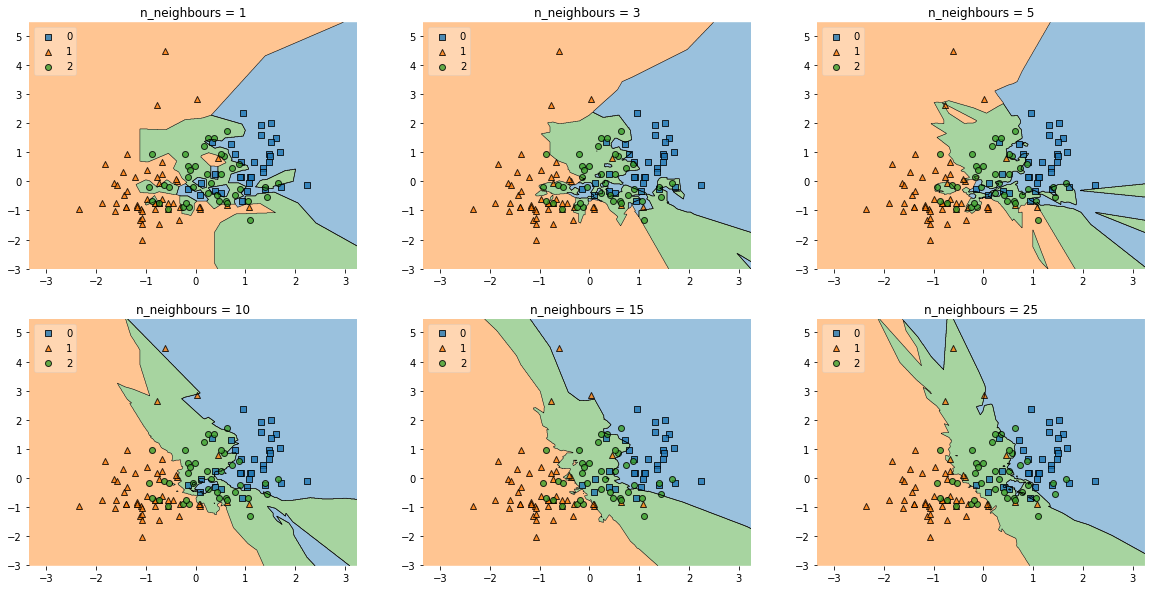

In [10]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)


fig = plt.figure(figsize=(20,10))

labels = ["n_neighbours = " + str(number) for number in NN]
for clf, lab, grd in zip(list_of_classifiers,
                         labels,
                         list(itertools.product([0, 1, 2], repeat=2))[:-3]):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled.to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [11]:
# Точность везде плохая, так что при выборе надо обратить внимание на графики
# По графикам видно, что в случае 1,3,5,10 соседей слишком сильное влияние оказывают выбросы, поэтому это плохие модели.
# 15 и 25 соседей выглядят получше, видно четкое разделение на классы на графиках и выбросы не так сильно учитываются.
# Мне кажется оптимальный выбор будет 15,так как разделяющие поверхности выглядят более линейно.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

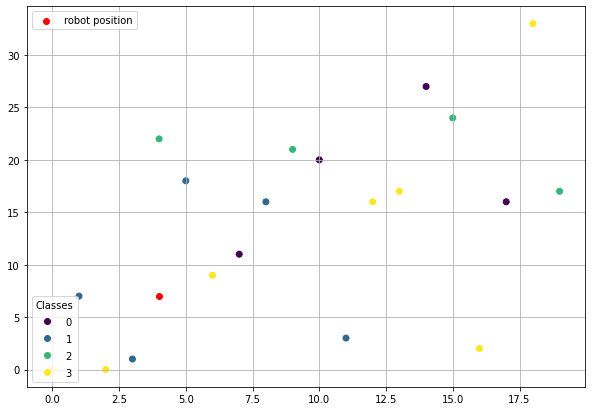

In [12]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        chance = np.random.binomial(1, 0.2)
        now_position = self.trajectory[-1]
        if chance == 1:
            new_position = now_position + self.mapping[0]
            self.trajectory.append(new_position)
        else:
            prediction = self.knn.predict(now_position.reshape(1, -1))
            new_position = now_position + self.mapping[prediction[0]]
            self.trajectory.append(new_position)      

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [15]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)

    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

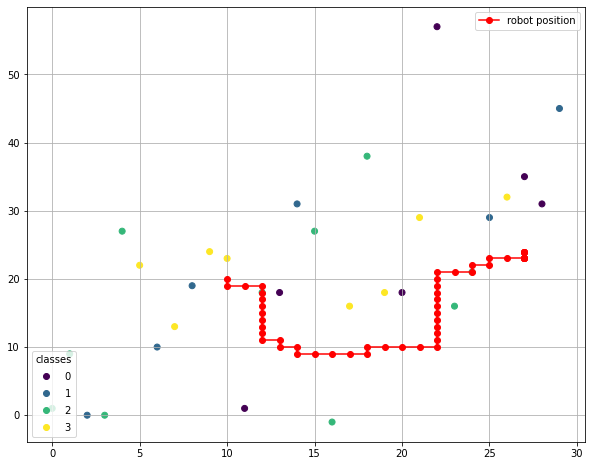

In [16]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

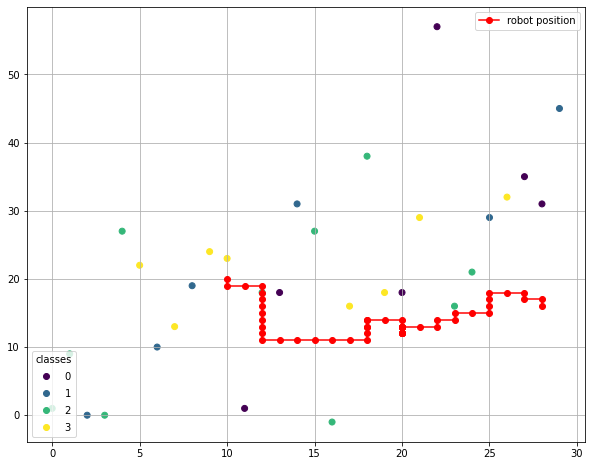

In [17]:
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

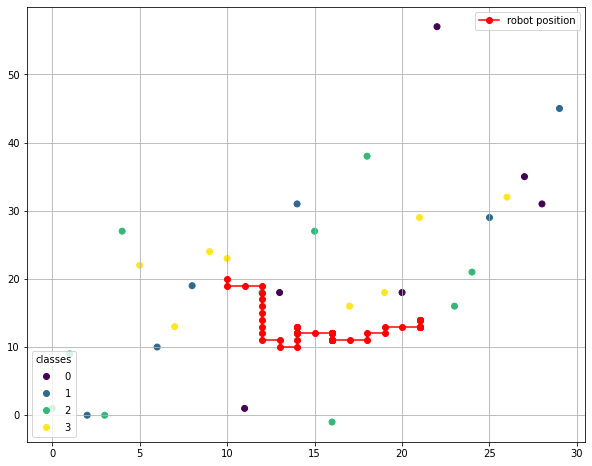

In [18]:
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

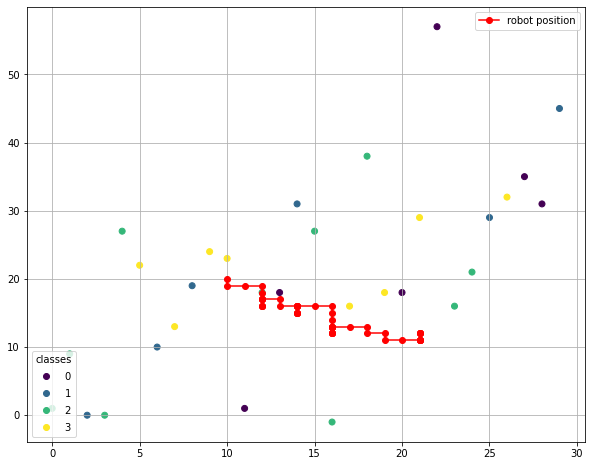

In [19]:
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)

In [20]:
# Если бы мы назначали меткам осмысленные классы, то тогда можно было бы, например, 5ти ближайшим меткам назначить один класс
# и движение робота было бы более предсказуемым.
# Чем больше соседей, тем более непредсказуемо двигается робот, по графику становится тяжело посчитать и понять какие
# у него ближайшие соседи, когда их слишком много.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [21]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [22]:
data.isnull().any().any()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [23]:
data = pd.read_csv('data/diamonds.csv', index_col=[0])
data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [24]:
X_num = data._get_numeric_data()
X_num.corr()["price"]
# carat, x, y ,z коррелируют с price больше всего

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [25]:
X = pd.get_dummies(data, drop_first=True)
X

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [26]:
Y = X["price"]
X.drop('price', axis = 1, inplace = True)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1337)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [27]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns = X_test.columns)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)
from sklearn.metrics import mean_squared_error
print("Train",mean_squared_error(Y_train, lr.predict(X_train_scaled)))
print("Test", mean_squared_error(Y_test, lr.predict(X_test_scaled)))

Train 1278935.9885269997
Test 1272521.3595092122


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [29]:
temp = list(zip(X.columns, lr.coef_,))
print(temp)

[('carat', 5317.797128255267), ('depth', -83.7448050662507), ('table', -57.27435365709787), ('x', -1028.7618660744577), ('y', 0.33284920975150845), ('z', -107.26934716441934), ('cut_Good', 174.18336736782342), ('cut_Ideal', 417.6571478098328), ('cut_Premium', 332.71676547726105), ('cut_Very Good', 309.51956357068497), ('color_E', -81.74844450974479), ('color_F', -100.09315954072622), ('color_G', -194.13659717609954), ('color_H', -354.38159283202424), ('color_I', -446.01040183169783), ('color_J', -524.293631368835), ('clarity_IF', 951.5773932903718), ('clarity_SI1', 1550.6094705806352), ('clarity_SI2', 989.1283656453305), ('clarity_VS1', 1624.6130761544582), ('clarity_VS2', 1767.5567695899729), ('clarity_VVS1', 1236.167926698528), ('clarity_VVS2', 1422.025571209865)]


In [30]:
# Самые большие веса и соответствующие им признаки
print(np.array([(x[0],x[1]) for x in temp if abs(x[1]) > 500]))

[['carat' '5317.797128255267']
 ['x' '-1028.7618660744577']
 ['color_J' '-524.293631368835']
 ['clarity_IF' '951.5773932903718']
 ['clarity_SI1' '1550.6094705806352']
 ['clarity_SI2' '989.1283656453305']
 ['clarity_VS1' '1624.6130761544582']
 ['clarity_VS2' '1767.5567695899729']
 ['clarity_VVS1' '1236.167926698528']
 ['clarity_VVS2' '1422.025571209865']]


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [31]:
from sklearn.linear_model import Ridge
print('Ridge')
ridge = Ridge(10).fit(X_train_scaled,Y_train)
print("Train", mean_squared_error(Y_train, ridge.predict(X_train_scaled)))
print("Test", mean_squared_error(Y_test, ridge.predict(X_test_scaled)))
temp = list(zip(X.columns, ridge.coef_))
print(np.array([(x[0],x[1]) for x in temp if abs(x[1]) > 500]))

from sklearn.linear_model import Lasso
print('Lasso')
lasso = Lasso(10).fit(X_train_scaled,Y_train)
print("Train", mean_squared_error(Y_train, lasso.predict(X_train_scaled)))
print("Test", mean_squared_error(Y_test, lasso.predict(X_test_scaled)))
temp = list(zip(X.columns, lasso.coef_))
print(np.array([(x[0],x[1]) for x in temp if abs(x[1]) > 500]))
# Веса примерное такие же остались в Ridge, а в Lasso некоторые уменьшились. Думаю, что проблема мультиколлинеарности
# проявлялась не сильно, ведь результаты на выборках примерно такие же как и в обычной регрессии.

Ridge
Train 1279056.602498967
Test 1273547.2614977404
[['carat' '5281.209866537457']
 ['x' '-977.7425649698808']
 ['color_J' '-523.0181653725177']
 ['clarity_IF' '939.7002760688789']
 ['clarity_SI1' '1521.622858945621']
 ['clarity_SI2' '964.5521329292462']
 ['clarity_VS1' '1600.4111136625004']
 ['clarity_VS2' '1739.4097869479867']
 ['clarity_VVS1' '1219.704513516693']
 ['clarity_VVS2' '1402.7092312412394']]
Lasso
Train 1336973.2608280592
Test 1337177.5875727576
[['carat' '4848.788214202413']
 ['x' '-582.7843363428905']
 ['clarity_IF' '644.487972345664']
 ['clarity_SI1' '836.8864837345725']
 ['clarity_VS1' '1021.5637413310142']
 ['clarity_VS2' '1070.397582559836']
 ['clarity_VVS1' '815.8472336817086']
 ['clarity_VVS2' '935.6244694561']]


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [32]:
a = [0.1, 1, 10, 100, 200]
ridge_weights = []
lasso_weights = []
for alpha in a:
    print(f'\nRidge {alpha}')
    ridge = Ridge(alpha).fit(X_train_scaled,Y_train)
    print("Train",mean_squared_error(Y_train, ridge.predict(X_train_scaled)))
    print("Test", mean_squared_error(Y_test, ridge.predict(X_test_scaled)))
    ridge_weights.append(ridge.coef_)
    
    print(f'\nLasso {alpha}')
    lasso = Lasso(alpha).fit(X_train_scaled,Y_train)
    print("Train",mean_squared_error(Y_train, lasso.predict(X_train_scaled)))
    print("Test", mean_squared_error(Y_test, lasso.predict(X_test_scaled)))
    lasso_weights.append(lasso.coef_)


Ridge 0.1
Train 1278936.0010044556
Test 1272530.6624661142

Lasso 0.1
Train 1278941.6053473384
Test 1272542.335010437

Ridge 1
Train 1278937.2323582624
Test 1272615.3183753348

Lasso 1
Train 1279515.182233734
Test 1273950.6384238475

Ridge 10
Train 1279056.602498967
Test 1273547.2614977404

Lasso 10
Train 1336973.2608280592
Test 1337177.5875727576

Ridge 100
Train 1288226.6411425117
Test 1287811.1152299596

Lasso 100
Train 1784114.391868933
Test 1764048.7137645753

Ridge 200
Train 1308451.6883296
Test 1308666.3328432657

Lasso 200
Train 2162196.2072790596
Test 2128642.6237409995


In [33]:
ridge_norm = [np.linalg.norm(x) for x in ridge_weights]
lasso_norm = [np.linalg.norm(x) for x in lasso_weights]

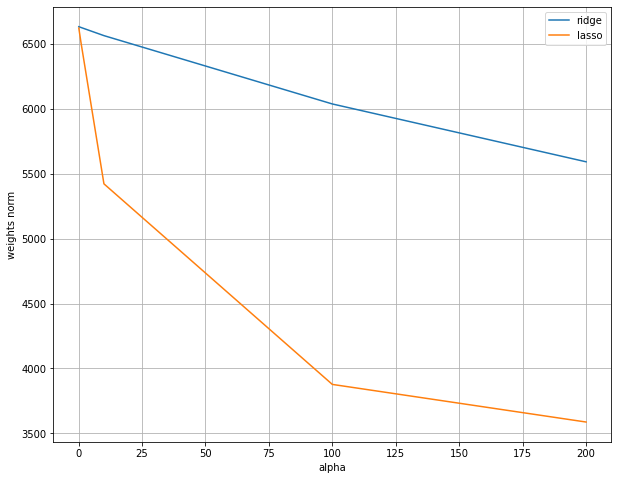

In [34]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(a, ridge_norm)
ax.plot(a, lasso_norm)

ax.set(xlabel='alpha', ylabel='weights norm')
ax.grid()
ax.legend(['ridge','lasso'])
plt.show()

In [35]:
# Видно, что lasso агрессивнеее уменьшает веса.
# Ну это и так понятно, ведь в лассо веса берутся по модулю, следовательно L1-норма получается больше,
# следовательно штрафует сильнее. Какие-то веса вообще могут занулиться, именно поэтому лассо используют для отбора признаков.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [36]:
from sklearn.linear_model import LassoCV
X_scaled = pd.DataFrame(data=scaler.fit_transform(X), columns = X.columns)
lassocv = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)
lassocv.fit(X_scaled,Y)
print('Порядок', lassocv.alphas_)
print('Средняя ошибка', lassocv.mse_path_.mean(axis = 1))

Порядок [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
Средняя ошибка [4547712.66098474 3667977.37880442 2517714.2086942  2279240.48498478
 2240178.96746424]


In [37]:
np.stack((lassocv.alphas_, lassocv.mse_path_.mean(axis = 1)), axis=-1)
# Самое хорошее качество при alpha = 0.1

array([[2.00000000e+02, 4.54771266e+06],
       [1.00000000e+02, 3.66797738e+06],
       [1.00000000e+01, 2.51771421e+06],
       [1.00000000e+00, 2.27924048e+06],
       [1.00000000e-01, 2.24017897e+06]])

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [38]:
lasso = Lasso(0.1).fit(X_train_scaled,Y_train)
temp = list(zip(lr.coef_, X.columns))
print('Наиболее весомые')
print(np.array([(x[1],x[0]) for x in temp if abs(x[0]) > 500]))

Наиболее весомые
[['carat' '5317.797128255267']
 ['x' '-1028.7618660744577']
 ['color_J' '-524.293631368835']
 ['clarity_IF' '951.5773932903718']
 ['clarity_SI1' '1550.6094705806352']
 ['clarity_SI2' '989.1283656453305']
 ['clarity_VS1' '1624.6130761544582']
 ['clarity_VS2' '1767.5567695899729']
 ['clarity_VVS1' '1236.167926698528']
 ['clarity_VVS2' '1422.025571209865']]


In [39]:
print('Наименее весомые')
print(np.array([(x[1],x[0]) for x in temp if abs(x[0]) < 500]))

Наименее весомые
[['depth' '-83.7448050662507']
 ['table' '-57.27435365709787']
 ['y' '0.33284920975150845']
 ['z' '-107.26934716441934']
 ['cut_Good' '174.18336736782342']
 ['cut_Ideal' '417.6571478098328']
 ['cut_Premium' '332.71676547726105']
 ['cut_Very Good' '309.51956357068497']
 ['color_E' '-81.74844450974479']
 ['color_F' '-100.09315954072622']
 ['color_G' '-194.13659717609954']
 ['color_H' '-354.38159283202424']
 ['color_I' '-446.01040183169783']]


In [40]:
# Караты, длина очень сильно влияют на цену. Веса цветов color(J-D) увеличиваются от худшего цвета J до лучшего E.
# Основную часть стоимости составляет clarity - чистота алмаза, но оказалось, что средняя чистота имеет самый большой вес.
# Признак cut показательный, его веса увеличиваются по мере увеличения качества среза.
# Об остальных признаках ничего сказать нельзя

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [41]:
print("Test lasso", mean_squared_error(Y_test, lasso.predict(X_test_scaled)))

Test lasso 1272542.335010437


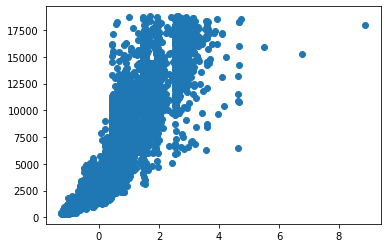

In [42]:
# В 3.7 - Test 1272521.3595092122, модели примерно одинаковые, скорее всего потому что лассо не сильно и меняет веса.
# Такой не очень хороший результат также может быть связан с тем, что определённые признаки имеют нелинейную зависимость от таргета.
plt.scatter(X_test_scaled['carat'], Y_test)

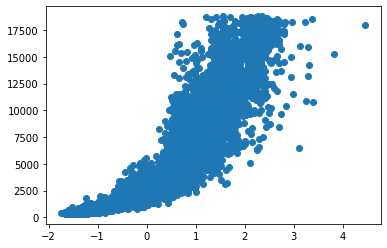

In [43]:
plt.scatter(X_test_scaled['x'], Y_test)

In [ ]:
# Параболические зависимости